#### 1. Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

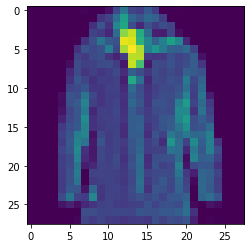

4


In [11]:
train_images = train_images / np.max(train_images)
plt.imshow(train_images[19])
plt.show()
print(train_labels[19])

In [12]:
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
train_images.shape

(60000, 784)

In [13]:
count_hidden_layers = [2, 3, 5, 10]
setting_neurons = [5, 7, 9, 11, 13, 15, 17, 19]
optim = ['sgd', 'adam', 'rmsprop', 'nadam']
batch_size_ = 128
validation_split_ = 0.15
epochs_ = 20
dict_hh_train = {}
dict_evaluate = {}

In [16]:
def model_fashion_mnist(count_layers, count_neurons, optim_):
    
    model_fashion_mnist = Sequential(name = 'MODEL_FASHION_MNIST' + '_' + str(count_layers) + 
                                     '_' + str(count_neurons) +  '_' + optim_)
    
    model_fashion_mnist.add(Dense(128, activation='relu', input_shape=(784,)))
    for layers in range(count_layers):
        model_fashion_mnist.add(Dense(count_neurons, activation='relu'))
    model_fashion_mnist.add(Dense(10, activation='softmax'))

    
    model_fashion_mnist.compile(optimizer=optim_, loss=keras.losses.CategoricalCrossentropy(), 
                                metrics=['accuracy'])
    hh = model_fashion_mnist.fit(train_images, train_labels_one_hot, 
                                 epochs=epochs_, batch_size=batch_size_, 
                                 validation_split=validation_split_)
    loss_accuracy = model_fashion_mnist.evaluate(test_images, test_labels_one_hot)
    
    model_fashion_mnist.save_weights( 'MODEL_FASHION_MNIST' + '_' + str(count_layers) + 
                                     '_' + str(count_neurons) +  '_' + optim_ + '.h5')
    
    dict_hh_train['MODEL_FASHION_MNIST' + 
                  '_' + str(count_layers) + 
                  '_' + str(count_neurons) +  '_' + optim_] = hh.history
    dict_evaluate['MODEL_FASHION_MNIST' + 
                  '_' + str(count_layers) + 
                  '_' + str(count_neurons) +
                  '_' + optim_] = loss_accuracy
    
    return dict_hh_train, dict_evaluate


In [17]:
for layer in count_hidden_layers:
    for neorons in setting_neurons:
        for optimazer in optim:
            dict_train, dict_eval = model_fashion_mnist(layer, neorons, optimazer)
            
        

Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 1.9964 - accuracy: 0.2649 - val_loss: 1.7343 - val_accuracy: 0.3929
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 1.5696 - accuracy: 0.4152 - val_loss: 1.4516 - val_accuracy: 0.4374
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3928 - accuracy: 0.4756 - val_loss: 1.3301 - val_accuracy: 0.5066
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 1.2426 - accuracy: 0.5428 - val_loss: 1.1616 - val_accuracy: 0.5622
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 1.1128 - accuracy: 0.5639 - val_loss: 1.0726 - val_accuracy: 0.5529
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.0313 - accuracy: 0.5859 - val_loss: 1.0002 - val_accuracy: 0.6000
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.9734 - accuracy: 0.6081 - val_loss: 0.9458 - val_accuracy: 0.6198
Epoch 

399/399 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9030 - val_loss: 0.3883 - val_accuracy: 0.8688
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.9052 - val_loss: 0.4153 - val_accuracy: 0.8580
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2566 - accuracy: 0.9066 - val_loss: 0.3902 - val_accuracy: 0.8672
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 68.8047 - accuracy: 0.8436
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 1.3205 - accuracy: 0.5641 - val_loss: 0.9378 - val_accuracy: 0.6921
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.7348 - accuracy: 0.7895 - val_loss: 0.6475 - val_accuracy: 0.8181
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.5848 - accuracy: 0.8316 - val_loss: 0.5791 - val_accuracy: 0.8223
Epoch 4/20
399/399 [==============================] - 1

399/399 [==============================] - 1s 3ms/step - loss: 0.2842 - accuracy: 0.8963 - val_loss: 0.3541 - val_accuracy: 0.8767
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.8998 - val_loss: 0.3319 - val_accuracy: 0.8840
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2669 - accuracy: 0.9030 - val_loss: 0.3438 - val_accuracy: 0.8783
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9045 - val_loss: 0.3779 - val_accuracy: 0.8722
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2567 - accuracy: 0.9065 - val_loss: 0.3541 - val_accuracy: 0.8780
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2481 - accuracy: 0.9089 - val_loss: 0.3404 - val_accuracy: 0.8813
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9103 - val_loss: 0.3330 - val_accuracy: 0.8858
Epoch 19/20

399/399 [==============================] - 1s 3ms/step - loss: 0.5730 - accuracy: 0.7898 - val_loss: 0.5850 - val_accuracy: 0.7809
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5530 - accuracy: 0.7983 - val_loss: 0.5705 - val_accuracy: 0.7977
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5351 - accuracy: 0.8075 - val_loss: 0.5435 - val_accuracy: 0.8031
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.8141 - val_loss: 0.5573 - val_accuracy: 0.7969
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5053 - accuracy: 0.8211 - val_loss: 0.5278 - val_accuracy: 0.8111
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4919 - accuracy: 0.8250 - val_loss: 0.5091 - val_accuracy: 0.8228
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.8314 - val_loss: 0.4902 - val_accuracy: 0.8292
Epoch 14/20
3

399/399 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.8340 - val_loss: 0.4490 - val_accuracy: 0.8500
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4116 - accuracy: 0.8570 - val_loss: 0.4131 - val_accuracy: 0.8563
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3728 - accuracy: 0.8693 - val_loss: 0.3883 - val_accuracy: 0.8669
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3427 - accuracy: 0.8790 - val_loss: 0.3679 - val_accuracy: 0.8744
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3239 - accuracy: 0.8848 - val_loss: 0.3705 - val_accuracy: 0.8712
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3086 - accuracy: 0.8884 - val_loss: 0.3628 - val_accuracy: 0.8724
Epoch 8/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2961 - accuracy: 0.8932 - val_loss: 0.3597 - val_accuracy: 0.8786
Epoch 9/20
399/39

399/399 [==============================] - 1s 3ms/step - loss: 0.2319 - accuracy: 0.9148 - val_loss: 0.3462 - val_accuracy: 0.8834
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9175 - val_loss: 0.3520 - val_accuracy: 0.8787
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 69.4979 - accuracy: 0.8625
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.8008 - accuracy: 0.7164 - val_loss: 0.6910 - val_accuracy: 0.7441
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.8300 - val_loss: 0.4601 - val_accuracy: 0.8396
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8517 - val_loss: 0.4424 - val_accuracy: 0.8459
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.4194 - val_accuracy: 0.8534
Epoch 5/20
399/399 [==============================] - 1s

Epoch 14/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8499 - val_loss: 0.4473 - val_accuracy: 0.8432
Epoch 15/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8518 - val_loss: 0.4424 - val_accuracy: 0.8446
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8533 - val_loss: 0.4374 - val_accuracy: 0.8431
Epoch 17/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8573 - val_loss: 0.4305 - val_accuracy: 0.8500
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4025 - accuracy: 0.8585 - val_loss: 0.4171 - val_accuracy: 0.8533
Epoch 19/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8604 - val_loss: 0.4249 - val_accuracy: 0.8461
Epoch 20/20
313/313 [==============================] - 1s 1ms/step - loss: 76.7249 - accuracy: 0.8130
Epoch 1/20
399/399 [====================

399/399 [==============================] - 2s 4ms/step - loss: 0.2775 - accuracy: 0.8993 - val_loss: 0.4018 - val_accuracy: 0.8574
Epoch 10/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2672 - accuracy: 0.9008 - val_loss: 0.5204 - val_accuracy: 0.8444
Epoch 11/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2591 - accuracy: 0.9058 - val_loss: 0.3441 - val_accuracy: 0.8812
Epoch 12/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2497 - accuracy: 0.9083 - val_loss: 0.3327 - val_accuracy: 0.8837
Epoch 13/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2425 - accuracy: 0.9109 - val_loss: 0.3258 - val_accuracy: 0.8878
Epoch 14/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2352 - accuracy: 0.9135 - val_loss: 0.3452 - val_accuracy: 0.8863
Epoch 15/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2290 - accuracy: 0.9157 - val_loss: 0.3299 - val_accuracy: 0.8890
Epoch 16/20

399/399 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8671 - val_loss: 0.4385 - val_accuracy: 0.8474
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3474 - accuracy: 0.8749 - val_loss: 0.4124 - val_accuracy: 0.8528
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3284 - accuracy: 0.8811 - val_loss: 0.4307 - val_accuracy: 0.8530
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.8870 - val_loss: 0.3814 - val_accuracy: 0.8609
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8917 - val_loss: 0.5216 - val_accuracy: 0.8061
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8954 - val_loss: 0.3541 - val_accuracy: 0.8759
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.8978 - val_loss: 0.3555 - val_accuracy: 0.8754
Epoch 11/20
399/

313/313 [==============================] - 1s 2ms/step - loss: 68.3500 - accuracy: 0.8275
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.7322 - accuracy: 0.7555 - val_loss: 0.4796 - val_accuracy: 0.8394
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.8476 - val_loss: 0.3985 - val_accuracy: 0.8581
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3820 - accuracy: 0.8639 - val_loss: 0.3871 - val_accuracy: 0.8643
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3563 - accuracy: 0.8712 - val_loss: 0.3701 - val_accuracy: 0.8701
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3304 - accuracy: 0.8815 - val_loss: 0.3679 - val_accuracy: 0.8726
Epoch 6/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3203 - accuracy: 0.8831 - val_loss: 0.3510 - val_accuracy: 0.8778
Epoch 7/20
399/399 [==============================] - 1s 3

Epoch 16/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2148 - accuracy: 0.9208 - val_loss: 0.3527 - val_accuracy: 0.8849
Epoch 17/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2090 - accuracy: 0.9235 - val_loss: 0.3378 - val_accuracy: 0.8896
Epoch 18/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2038 - accuracy: 0.9253 - val_loss: 0.3496 - val_accuracy: 0.8879
Epoch 19/20
399/399 [==============================] - 2s 5ms/step - loss: 0.1977 - accuracy: 0.9271 - val_loss: 0.3462 - val_accuracy: 0.8882
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 78.9593 - accuracy: 0.8528
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 1.7659 - accuracy: 0.4178 - val_loss: 1.0933 - val_accuracy: 0.6217
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.8662 - accuracy: 0.7026 - val_loss: 0.7369 - val_accuracy: 0.7469
Epoch 3/20
399/399 [======================

399/399 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.9029 - val_loss: 0.3487 - val_accuracy: 0.8814
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9044 - val_loss: 0.3650 - val_accuracy: 0.8697
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.9064 - val_loss: 0.3685 - val_accuracy: 0.8707
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2441 - accuracy: 0.9094 - val_loss: 0.3727 - val_accuracy: 0.8701
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.9113 - val_loss: 0.3352 - val_accuracy: 0.8853
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.9137 - val_loss: 0.4213 - val_accuracy: 0.8589
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9151 - val_loss: 0.3429 - val_accuracy: 0.8846
Epoch 18/20

399/399 [==============================] - 1s 3ms/step - loss: 0.3902 - accuracy: 0.8639 - val_loss: 0.4050 - val_accuracy: 0.8630
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8715 - val_loss: 0.3980 - val_accuracy: 0.8607
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8766 - val_loss: 0.3807 - val_accuracy: 0.8669
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8813 - val_loss: 0.3845 - val_accuracy: 0.8716
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8849 - val_loss: 0.3682 - val_accuracy: 0.8732
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.8876 - val_loss: 0.3803 - val_accuracy: 0.8708
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3062 - accuracy: 0.8902 - val_loss: 0.3521 - val_accuracy: 0.8799
Epoch 13/20
39

399/399 [==============================] - 1s 3ms/step - loss: 2.1902 - accuracy: 0.2111 - val_loss: 1.9952 - val_accuracy: 0.2728
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 1.8276 - accuracy: 0.2985 - val_loss: 1.7053 - val_accuracy: 0.3292
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 1.6091 - accuracy: 0.3804 - val_loss: 1.4966 - val_accuracy: 0.4190
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 1.4210 - accuracy: 0.4458 - val_loss: 1.3446 - val_accuracy: 0.4654
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 1.2974 - accuracy: 0.4863 - val_loss: 1.2548 - val_accuracy: 0.5019
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.1659 - accuracy: 0.5684 - val_loss: 1.0828 - val_accuracy: 0.6149
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.9994 - accuracy: 0.6269 - val_loss: 0.9557 - val_accuracy: 0.6270
Epoch 8/20
399/39

399/399 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9069 - val_loss: 0.3764 - val_accuracy: 0.8666
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9092 - val_loss: 0.3951 - val_accuracy: 0.8689
Epoch 19/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2449 - accuracy: 0.9106 - val_loss: 0.3654 - val_accuracy: 0.8801
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 72.0236 - accuracy: 0.8585
Epoch 1/20
399/399 [==============================] - 3s 4ms/step - loss: 1.1879 - accuracy: 0.5815 - val_loss: 0.6928 - val_accuracy: 0.7678
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.5931 - accuracy: 0.7856 - val_loss: 0.5144 - val_accuracy: 0.8173
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4729 - accuracy: 0.8305 - val_loss: 0.4463 - val_accuracy: 0.8419
Epoch 4/20
399/399 [==============================] - 2

Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2706 - accuracy: 0.9021 - val_loss: 0.3550 - val_accuracy: 0.8778
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9041 - val_loss: 0.3335 - val_accuracy: 0.8846
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9068 - val_loss: 0.3521 - val_accuracy: 0.8779
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9088 - val_loss: 0.3510 - val_accuracy: 0.8823
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2476 - accuracy: 0.9091 - val_loss: 0.3736 - val_accuracy: 0.8710
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.9136 - val_loss: 0.3503 - val_accuracy: 0.8813
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.9129 - val_loss: 0.3456 - val_accuracy: 0.8828

399/399 [==============================] - 1s 3ms/step - loss: 0.5796 - accuracy: 0.7946 - val_loss: 0.5995 - val_accuracy: 0.7842
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.8017 - val_loss: 0.5444 - val_accuracy: 0.8091
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5373 - accuracy: 0.8110 - val_loss: 0.5256 - val_accuracy: 0.8139
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.8185 - val_loss: 0.5323 - val_accuracy: 0.8123
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5051 - accuracy: 0.8245 - val_loss: 0.5385 - val_accuracy: 0.8021
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.8272 - val_loss: 0.5519 - val_accuracy: 0.8010
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.8324 - val_loss: 0.5385 - val_accuracy: 0.7998
Epoch 15/20


399/399 [==============================] - 2s 4ms/step - loss: 0.4282 - accuracy: 0.8505 - val_loss: 0.4388 - val_accuracy: 0.8492
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3871 - accuracy: 0.8646 - val_loss: 0.4015 - val_accuracy: 0.8604
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3603 - accuracy: 0.8722 - val_loss: 0.5000 - val_accuracy: 0.8254
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3373 - accuracy: 0.8802 - val_loss: 0.3735 - val_accuracy: 0.8727
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3186 - accuracy: 0.8854 - val_loss: 0.3570 - val_accuracy: 0.8777
Epoch 8/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3047 - accuracy: 0.8915 - val_loss: 0.3559 - val_accuracy: 0.8750
Epoch 9/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2922 - accuracy: 0.8953 - val_loss: 0.3673 - val_accuracy: 0.8747
Epoch 10/20
399/3

399/399 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9153 - val_loss: 0.3419 - val_accuracy: 0.8836
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 76.6143 - accuracy: 0.8552
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.8526 - accuracy: 0.7192 - val_loss: 0.6332 - val_accuracy: 0.7769
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4888 - accuracy: 0.8309 - val_loss: 0.5264 - val_accuracy: 0.8060
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8500 - val_loss: 0.4489 - val_accuracy: 0.8474
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8609 - val_loss: 0.4675 - val_accuracy: 0.8394
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8710 - val_loss: 0.3971 - val_accuracy: 0.8619
Epoch 6/20
399/399 [==============================] - 1s 

Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8534 - val_loss: 0.4969 - val_accuracy: 0.8234
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8547 - val_loss: 0.4265 - val_accuracy: 0.8503
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4020 - accuracy: 0.8592 - val_loss: 0.4337 - val_accuracy: 0.8529
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8616 - val_loss: 0.4933 - val_accuracy: 0.8293
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8615 - val_loss: 0.4047 - val_accuracy: 0.8590
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 77.7254 - accuracy: 0.8217
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.7845 - accuracy: 0.7403 - val_loss: 0.4996 - val_accuracy: 0.8228
Epoch 2/20
399/399 [=====================

399/399 [==============================] - 2s 4ms/step - loss: 0.2731 - accuracy: 0.9002 - val_loss: 0.3380 - val_accuracy: 0.8803
Epoch 11/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2656 - accuracy: 0.9037 - val_loss: 0.3680 - val_accuracy: 0.8678
Epoch 12/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2549 - accuracy: 0.9073 - val_loss: 0.3423 - val_accuracy: 0.8789
Epoch 13/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2490 - accuracy: 0.9082 - val_loss: 0.3428 - val_accuracy: 0.8798
Epoch 14/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2399 - accuracy: 0.9122 - val_loss: 0.4316 - val_accuracy: 0.8551
Epoch 15/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2338 - accuracy: 0.9140 - val_loss: 0.3340 - val_accuracy: 0.8818
Epoch 16/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2264 - accuracy: 0.9178 - val_loss: 0.3290 - val_accuracy: 0.8849
Epoch 17/20

399/399 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8738 - val_loss: 0.3981 - val_accuracy: 0.8554
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8804 - val_loss: 0.3524 - val_accuracy: 0.8719
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3114 - accuracy: 0.8874 - val_loss: 0.4465 - val_accuracy: 0.8442
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8905 - val_loss: 0.4171 - val_accuracy: 0.8469
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8943 - val_loss: 0.3765 - val_accuracy: 0.8617
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.8980 - val_loss: 0.3732 - val_accuracy: 0.8748
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9015 - val_loss: 0.3418 - val_accuracy: 0.8833
Epoch 12/20
399

313/313 [==============================] - 1s 2ms/step - loss: 87.4292 - accuracy: 0.8040
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.7822 - accuracy: 0.7302 - val_loss: 0.4920 - val_accuracy: 0.8222
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.8433 - val_loss: 0.4264 - val_accuracy: 0.8518
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8607 - val_loss: 0.3963 - val_accuracy: 0.8591
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3680 - accuracy: 0.8682 - val_loss: 0.3707 - val_accuracy: 0.8682
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8755 - val_loss: 0.3632 - val_accuracy: 0.8706
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8813 - val_loss: 0.3697 - val_accuracy: 0.8679
Epoch 7/20
399/399 [==============================] - 1s 3

399/399 [==============================] - 2s 4ms/step - loss: 0.2180 - accuracy: 0.9191 - val_loss: 0.3302 - val_accuracy: 0.8871
Epoch 17/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2107 - accuracy: 0.9230 - val_loss: 0.3273 - val_accuracy: 0.8888
Epoch 18/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2042 - accuracy: 0.9232 - val_loss: 0.3662 - val_accuracy: 0.8813
Epoch 19/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2000 - accuracy: 0.9250 - val_loss: 0.3446 - val_accuracy: 0.8859
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 91.3252 - accuracy: 0.8269
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1028 - val_loss: 2.2975 - val_accuracy: 0.0950
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 2.2838 - accuracy: 0.1454 - val_loss: 2.2628 - val_accuracy: 0.1623
Epoch 3/20
399/399 [==============================] - 

399/399 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.8313 - val_loss: 0.5654 - val_accuracy: 0.8193
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.8346 - val_loss: 0.5282 - val_accuracy: 0.8339
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4790 - accuracy: 0.8394 - val_loss: 0.5352 - val_accuracy: 0.8317
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4674 - accuracy: 0.8434 - val_loss: 0.5200 - val_accuracy: 0.8371
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.8477 - val_loss: 0.5153 - val_accuracy: 0.8344
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.8505 - val_loss: 0.5300 - val_accuracy: 0.8366
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.8532 - val_loss: 0.5101 - val_accuracy: 0.8407
Epoch 18/20

399/399 [==============================] - 1s 3ms/step - loss: 0.5447 - accuracy: 0.7797 - val_loss: 0.5646 - val_accuracy: 0.7744
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5174 - accuracy: 0.7904 - val_loss: 0.5433 - val_accuracy: 0.7791
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4962 - accuracy: 0.7970 - val_loss: 0.5259 - val_accuracy: 0.7981
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.8041 - val_loss: 0.5245 - val_accuracy: 0.7933
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.8172 - val_loss: 0.4866 - val_accuracy: 0.8156
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8378 - val_loss: 0.4783 - val_accuracy: 0.8256
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8513 - val_loss: 0.4654 - val_accuracy: 0.8449
Epoch 13/20
39

399/399 [==============================] - 2s 3ms/step - loss: 2.2656 - accuracy: 0.1473 - val_loss: 2.1898 - val_accuracy: 0.1789
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 2.0852 - accuracy: 0.2082 - val_loss: 1.9657 - val_accuracy: 0.3141
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 1.8323 - accuracy: 0.3405 - val_loss: 1.7069 - val_accuracy: 0.3661
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 1.5881 - accuracy: 0.3951 - val_loss: 1.4178 - val_accuracy: 0.4559
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 1.2957 - accuracy: 0.5000 - val_loss: 1.1919 - val_accuracy: 0.5649
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.0772 - accuracy: 0.5841 - val_loss: 0.9875 - val_accuracy: 0.6054
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.8868 - accuracy: 0.6349 - val_loss: 0.8989 - val_accuracy: 0.6324
Epoch 8/20
399/39

399/399 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8925 - val_loss: 0.3684 - val_accuracy: 0.8752
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.8935 - val_loss: 0.3831 - val_accuracy: 0.8632
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8955 - val_loss: 0.3843 - val_accuracy: 0.8688
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 59.7559 - accuracy: 0.8485
Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 1.0306 - accuracy: 0.6168 - val_loss: 0.6232 - val_accuracy: 0.7862
Epoch 2/20
399/399 [==============================] - 2s 5ms/step - loss: 0.5188 - accuracy: 0.8228 - val_loss: 0.5631 - val_accuracy: 0.8122
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4463 - accuracy: 0.8485 - val_loss: 0.4427 - val_accuracy: 0.8473
Epoch 4/20
399/399 [==============================] - 2

399/399 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.8903 - val_loss: 0.3510 - val_accuracy: 0.8767
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8934 - val_loss: 0.3708 - val_accuracy: 0.8716
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.8956 - val_loss: 0.3581 - val_accuracy: 0.8773
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.9002 - val_loss: 0.3657 - val_accuracy: 0.8717
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.9010 - val_loss: 0.3588 - val_accuracy: 0.8724
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9034 - val_loss: 0.3474 - val_accuracy: 0.8833
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.9073 - val_loss: 0.3495 - val_accuracy: 0.8771
Epoch 19/20

399/399 [==============================] - 1s 3ms/step - loss: 0.5863 - accuracy: 0.7840 - val_loss: 0.6511 - val_accuracy: 0.7614
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5610 - accuracy: 0.7917 - val_loss: 0.7998 - val_accuracy: 0.7040
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5409 - accuracy: 0.8016 - val_loss: 0.5388 - val_accuracy: 0.7994
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.8115 - val_loss: 0.5517 - val_accuracy: 0.8053
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5030 - accuracy: 0.8186 - val_loss: 0.4969 - val_accuracy: 0.8252
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.8254 - val_loss: 0.4791 - val_accuracy: 0.8307
Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.8320 - val_loss: 0.4718 - val_accuracy: 0.8350
Epoch 14/20
3

399/399 [==============================] - 2s 4ms/step - loss: 0.5063 - accuracy: 0.8235 - val_loss: 0.5922 - val_accuracy: 0.7956
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4398 - accuracy: 0.8459 - val_loss: 0.4279 - val_accuracy: 0.8508
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4041 - accuracy: 0.8570 - val_loss: 0.4215 - val_accuracy: 0.8503
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3753 - accuracy: 0.8668 - val_loss: 0.4142 - val_accuracy: 0.8611
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.8743 - val_loss: 0.3811 - val_accuracy: 0.8690
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3380 - accuracy: 0.8795 - val_loss: 0.4255 - val_accuracy: 0.8489
Epoch 8/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3223 - accuracy: 0.8837 - val_loss: 0.4052 - val_accuracy: 0.8617
Epoch 9/20
399/39

399/399 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.9114 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.9131 - val_loss: 0.3395 - val_accuracy: 0.8876
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 71.0967 - accuracy: 0.8399
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.8947 - accuracy: 0.6726 - val_loss: 0.6142 - val_accuracy: 0.7640
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.8113 - val_loss: 0.4745 - val_accuracy: 0.8386
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.8397 - val_loss: 0.4209 - val_accuracy: 0.8508
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8526 - val_loss: 0.5220 - val_accuracy: 0.8203
Epoch 5/20
399/399 [==============================] - 1s

399/399 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8458 - val_loss: 0.4665 - val_accuracy: 0.8407
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8517 - val_loss: 0.4299 - val_accuracy: 0.8460
Epoch 15/20
399/399 [==============================] - 6s 16ms/step - loss: 0.4071 - accuracy: 0.8545 - val_loss: 0.4194 - val_accuracy: 0.8502
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8602 - val_loss: 0.4264 - val_accuracy: 0.8488
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8592 - val_loss: 0.4245 - val_accuracy: 0.8523
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8648 - val_loss: 0.4417 - val_accuracy: 0.8452
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.8667 - val_loss: 0.4362 - val_accuracy: 0.8431
Epoch 20/2

399/399 [==============================] - 2s 4ms/step - loss: 0.2896 - accuracy: 0.8951 - val_loss: 0.3603 - val_accuracy: 0.8718
Epoch 9/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2784 - accuracy: 0.8985 - val_loss: 0.3586 - val_accuracy: 0.8688
Epoch 10/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2678 - accuracy: 0.9020 - val_loss: 0.3954 - val_accuracy: 0.8614
Epoch 11/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2581 - accuracy: 0.9047 - val_loss: 0.3560 - val_accuracy: 0.8776
Epoch 12/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2499 - accuracy: 0.9096 - val_loss: 0.3962 - val_accuracy: 0.8697
Epoch 13/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2449 - accuracy: 0.9095 - val_loss: 0.3619 - val_accuracy: 0.8768
Epoch 14/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2358 - accuracy: 0.9126 - val_loss: 0.3496 - val_accuracy: 0.8818
Epoch 15/20


399/399 [==============================] - 1s 4ms/step - loss: 0.4479 - accuracy: 0.8391 - val_loss: 0.4501 - val_accuracy: 0.8467
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4010 - accuracy: 0.8563 - val_loss: 0.6205 - val_accuracy: 0.7853
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8659 - val_loss: 0.4603 - val_accuracy: 0.8252
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8738 - val_loss: 0.3818 - val_accuracy: 0.8632
Epoch 7/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3327 - accuracy: 0.8783 - val_loss: 0.3603 - val_accuracy: 0.8719
Epoch 8/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3191 - accuracy: 0.8840 - val_loss: 0.3676 - val_accuracy: 0.8703
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3062 - accuracy: 0.8879 - val_loss: 0.3346 - val_accuracy: 0.8816
Epoch 10/20
399/3

399/399 [==============================] - 1s 3ms/step - loss: 2.2852 - accuracy: 0.1866 - val_loss: 2.2729 - val_accuracy: 0.1889
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 41.7237 - accuracy: 0.1000
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 1.9953 - accuracy: 0.1885 - val_loss: 1.7830 - val_accuracy: 0.2156
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3868 - accuracy: 0.4256 - val_loss: 1.0868 - val_accuracy: 0.5409
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.9890 - accuracy: 0.5615 - val_loss: 0.9482 - val_accuracy: 0.5841
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.8959 - accuracy: 0.5941 - val_loss: 0.8761 - val_accuracy: 0.6090
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.8498 - accuracy: 0.6093 - val_loss: 0.8376 - val_accuracy: 0.6253
Epoch 6/20
399/399 [==============================] - 1s 

399/399 [==============================] - 2s 4ms/step - loss: 0.5050 - accuracy: 0.8377 - val_loss: 0.5596 - val_accuracy: 0.8221
Epoch 15/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4858 - accuracy: 0.8433 - val_loss: 0.5652 - val_accuracy: 0.8232
Epoch 16/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4729 - accuracy: 0.8491 - val_loss: 0.5441 - val_accuracy: 0.8318
Epoch 17/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4546 - accuracy: 0.8553 - val_loss: 0.5667 - val_accuracy: 0.8403
Epoch 18/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4411 - accuracy: 0.8596 - val_loss: 0.5484 - val_accuracy: 0.8382
Epoch 19/20
399/399 [==============================] - 2s 5ms/step - loss: 0.4306 - accuracy: 0.8620 - val_loss: 0.5336 - val_accuracy: 0.8374
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 288.6607 - accuracy: 0.3166
Epoch 1/20
399/399 [==============================]

399/399 [==============================] - 2s 4ms/step - loss: 0.4848 - accuracy: 0.8195 - val_loss: 0.5171 - val_accuracy: 0.8071
Epoch 10/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4715 - accuracy: 0.8259 - val_loss: 0.5136 - val_accuracy: 0.8183
Epoch 11/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4546 - accuracy: 0.8328 - val_loss: 0.4751 - val_accuracy: 0.8288
Epoch 12/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4384 - accuracy: 0.8391 - val_loss: 0.4679 - val_accuracy: 0.8320
Epoch 13/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8448 - val_loss: 0.4478 - val_accuracy: 0.8440
Epoch 14/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8501 - val_loss: 0.4485 - val_accuracy: 0.8438
Epoch 15/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4032 - accuracy: 0.8572 - val_loss: 0.4314 - val_accuracy: 0.8493
Epoch 16/20

399/399 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.8184 - val_loss: 0.5298 - val_accuracy: 0.8186
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4762 - accuracy: 0.8381 - val_loss: 0.4919 - val_accuracy: 0.8333
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4475 - accuracy: 0.8469 - val_loss: 0.5111 - val_accuracy: 0.8237
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.8518 - val_loss: 0.4676 - val_accuracy: 0.8379
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8615 - val_loss: 0.4446 - val_accuracy: 0.8503
Epoch 9/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3884 - accuracy: 0.8659 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8699 - val_loss: 0.4452 - val_accuracy: 0.8520
Epoch 11/20
399/

313/313 [==============================] - 1s 2ms/step - loss: 67.2956 - accuracy: 0.7151
Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 2.2979 - accuracy: 0.1255 - val_loss: 2.2909 - val_accuracy: 0.1236
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 2.2672 - accuracy: 0.1535 - val_loss: 2.2215 - val_accuracy: 0.1589
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 2.0578 - accuracy: 0.1855 - val_loss: 1.8274 - val_accuracy: 0.1907
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 1.6908 - accuracy: 0.2297 - val_loss: 1.6008 - val_accuracy: 0.2590
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 1.5056 - accuracy: 0.3356 - val_loss: 1.3963 - val_accuracy: 0.4189
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3017 - accuracy: 0.4444 - val_loss: 1.2119 - val_accuracy: 0.4661
Epoch 7/20
399/399 [==============================] - 1s 3

Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8832 - val_loss: 0.4031 - val_accuracy: 0.8631
Epoch 17/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8857 - val_loss: 0.3733 - val_accuracy: 0.8746
Epoch 18/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3153 - accuracy: 0.8889 - val_loss: 0.4479 - val_accuracy: 0.8442
Epoch 19/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3100 - accuracy: 0.8903 - val_loss: 0.4103 - val_accuracy: 0.8628
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 140.5182 - accuracy: 0.6593
Epoch 1/20
399/399 [==============================] - 4s 5ms/step - loss: 1.2748 - accuracy: 0.5260 - val_loss: 0.7796 - val_accuracy: 0.7332
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.6453 - accuracy: 0.7795 - val_loss: 0.5932 - val_accuracy: 0.7967
Epoch 3/20
399/399 [=====================

399/399 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.8811 - val_loss: 0.4000 - val_accuracy: 0.8622
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8851 - val_loss: 0.4835 - val_accuracy: 0.8386
Epoch 13/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.8877 - val_loss: 0.3853 - val_accuracy: 0.8689
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3093 - accuracy: 0.8902 - val_loss: 0.3893 - val_accuracy: 0.8654
Epoch 15/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3037 - accuracy: 0.8920 - val_loss: 0.3663 - val_accuracy: 0.8764
Epoch 16/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2956 - accuracy: 0.8947 - val_loss: 0.3870 - val_accuracy: 0.8749
Epoch 17/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2879 - accuracy: 0.8976 - val_loss: 0.3650 - val_accuracy: 0.8761
Epoch 18/20

399/399 [==============================] - 1s 3ms/step - loss: 1.0471 - accuracy: 0.6231 - val_loss: 0.9022 - val_accuracy: 0.6177
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.8324 - accuracy: 0.6705 - val_loss: 0.8055 - val_accuracy: 0.6701
Epoch 8/20
399/399 [==============================] - 1s 3ms/step - loss: 0.7538 - accuracy: 0.7002 - val_loss: 0.7223 - val_accuracy: 0.7210
Epoch 9/20
399/399 [==============================] - 1s 3ms/step - loss: 0.6983 - accuracy: 0.7351 - val_loss: 0.7286 - val_accuracy: 0.7306
Epoch 10/20
399/399 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.7648 - val_loss: 0.6563 - val_accuracy: 0.7701
Epoch 11/20
399/399 [==============================] - 1s 3ms/step - loss: 0.6001 - accuracy: 0.7790 - val_loss: 0.7915 - val_accuracy: 0.7228
Epoch 12/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5642 - accuracy: 0.7924 - val_loss: 0.5624 - val_accuracy: 0.7960
Epoch 13/20
39

399/399 [==============================] - 3s 5ms/step - loss: 1.1082 - accuracy: 0.5836 - val_loss: 0.7623 - val_accuracy: 0.7423
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.5889 - accuracy: 0.7817 - val_loss: 0.5367 - val_accuracy: 0.8038
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.5025 - accuracy: 0.8133 - val_loss: 0.4994 - val_accuracy: 0.8258
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4455 - accuracy: 0.8397 - val_loss: 0.5219 - val_accuracy: 0.8051
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4048 - accuracy: 0.8556 - val_loss: 0.4109 - val_accuracy: 0.8542
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3723 - accuracy: 0.8679 - val_loss: 0.3796 - val_accuracy: 0.8668
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3467 - accuracy: 0.8767 - val_loss: 0.3727 - val_accuracy: 0.8714
Epoch 8/20
399/39

399/399 [==============================] - 1s 4ms/step - loss: 0.2612 - accuracy: 0.9045 - val_loss: 0.3509 - val_accuracy: 0.8811
Epoch 18/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2558 - accuracy: 0.9055 - val_loss: 0.3877 - val_accuracy: 0.8687
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.9075 - val_loss: 0.3556 - val_accuracy: 0.8778
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 54.4912 - accuracy: 0.8481
Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 1.1658 - accuracy: 0.6029 - val_loss: 0.7120 - val_accuracy: 0.7663
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.5896 - accuracy: 0.7865 - val_loss: 0.5994 - val_accuracy: 0.7883
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.5000 - accuracy: 0.8196 - val_loss: 0.5345 - val_accuracy: 0.8089
Epoch 4/20
399/399 [==============================] - 2

Epoch 13/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5007 - accuracy: 0.8211 - val_loss: 0.5108 - val_accuracy: 0.8182
Epoch 14/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8285 - val_loss: 0.5478 - val_accuracy: 0.8017
Epoch 15/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8377 - val_loss: 0.5044 - val_accuracy: 0.8267
Epoch 16/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.8426 - val_loss: 0.4562 - val_accuracy: 0.8382
Epoch 17/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8457 - val_loss: 0.4490 - val_accuracy: 0.8388
Epoch 18/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8520 - val_loss: 0.4458 - val_accuracy: 0.8380
Epoch 19/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8565 - val_loss: 0.4946 - val_accuracy: 0.8272

399/399 [==============================] - 2s 4ms/step - loss: 0.3053 - accuracy: 0.8878 - val_loss: 0.3792 - val_accuracy: 0.8674
Epoch 9/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2966 - accuracy: 0.8907 - val_loss: 0.3467 - val_accuracy: 0.8751
Epoch 10/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2844 - accuracy: 0.8952 - val_loss: 0.4033 - val_accuracy: 0.8598
Epoch 11/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2760 - accuracy: 0.8987 - val_loss: 0.3659 - val_accuracy: 0.8749
Epoch 12/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2680 - accuracy: 0.9008 - val_loss: 0.3394 - val_accuracy: 0.8804
Epoch 13/20
399/399 [==============================] - 2s 5ms/step - loss: 0.2617 - accuracy: 0.9028 - val_loss: 0.3515 - val_accuracy: 0.8768
Epoch 14/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2515 - accuracy: 0.9070 - val_loss: 0.3407 - val_accuracy: 0.8832
Epoch 15/20


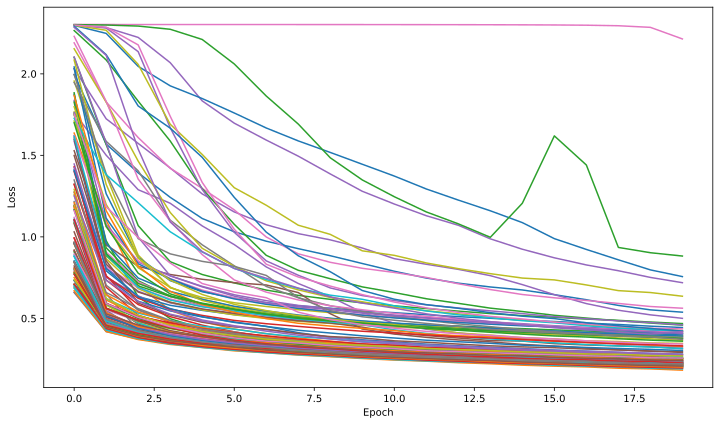

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=[12, 7])

for key, item in dict_hh_train.items():
    plt.plot(item['loss'], label=key)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
list_accuracy = []
list_name_model = []
for key, item in dict_eval.items():
    list_accuracy.append(item[1])
    list_name_model.append(key)

best_name_model = list_name_model[np.argmax(np.array(list_accuracy))]
best_accuracy = np.max(np.array(list_accuracy))
print(best_name_model, best_accuracy)
print(dict_eval[best_name_model])

MODEL_FASHION_MNIST_2_13_rmsprop 0.8709999918937683
[64.82915496826172, 0.8709999918937683]


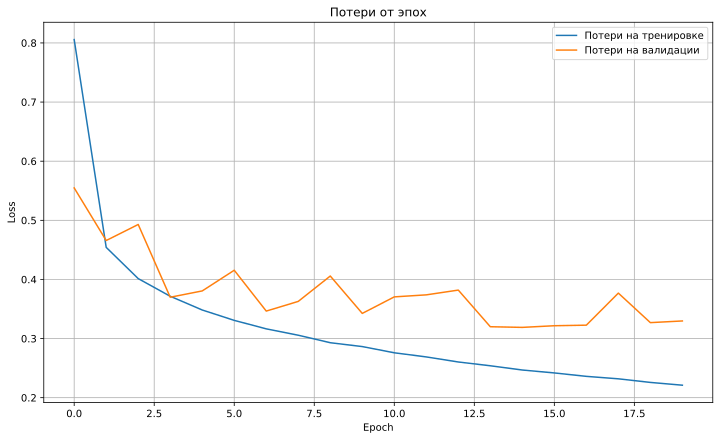

In [20]:
plt.figure(figsize=[12, 7])
plt.plot(dict_hh_train[best_name_model]['loss'], label='Потери на тренировке')
plt.plot(dict_hh_train[best_name_model]['val_loss'], label='Потери на валидации')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')
plt.show()

In [21]:
model_fashion_mnist = Sequential(name = best_name_model)

model_fashion_mnist.add(Dense(128, activation='relu', input_shape=(784,)))

for layers in range(int(best_name_model.split('_')[3])):
    model_fashion_mnist.add(Dense(int(best_name_model.split('_')[4]), activation='relu'))
model_fashion_mnist.add(Dense(10, activation='softmax'))

model_fashion_mnist.load_weights(best_name_model + '.h5')
    
model_fashion_mnist.compile(optimizer=best_name_model.split('_')[5],
                            loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

hh = model_fashion_mnist.fit(train_images, train_labels_one_hot, 
                                 epochs=epochs_, batch_size=batch_size_, 
                                 validation_split=validation_split_)

loss_accuracy = model_fashion_mnist.evaluate(test_images, test_labels_one_hot)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2177 - accuracy: 0.9200 - val_loss: 0.3370 - val_accuracy: 0.8902
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2126 - accuracy: 0.9204 - val_loss: 0.3579 - val_accuracy: 0.8829
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2076 - accuracy: 0.9230 - val_loss: 0.3467 - val_accuracy: 0.8882
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2025 - accuracy: 0.9243 - val_loss: 0.4072 - val_accuracy: 0.8797
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.1996 - accuracy: 0.9272 - val_loss: 0.3585 - val_accuracy: 0.8854
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9276 - val_loss: 0.4082 - val_accuracy: 0.8787
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.1926 - accuracy: 0.9292 - val_loss: 0.3796 - val_accuracy: 0.8828
Epoch 

In [22]:
model_fashion_mnist.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [23]:
y_pred = model_fashion_mnist.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
matrix_errors = confusion_matrix(y_pred_class, test_labels)
matrix_errors

array([[885,   0,  24,  54,   2,   0, 201,   0,   6,   0],
       [ 15, 992,  18,  67,  10,   1,   9,   0,   2,   0],
       [ 21,   0, 719,  19,  41,   0,  98,   0,   2,   0],
       [  4,   3,   4, 737,   8,   0,   8,   0,   0,   0],
       [ 15,   3, 210,  85, 919,   0, 239,   0,   9,   0],
       [  0,   0,   0,   1,   0, 960,   0,  29,   2,   4],
       [ 41,   1,  22,  28,  14,   0, 424,   0,   0,   1],
       [  0,   0,   0,   0,   0,  11,   0, 890,   3,  18],
       [ 19,   1,   2,   9,   5,   2,  20,   2, 976,   0],
       [  0,   0,   1,   0,   1,  26,   1,  79,   0, 977]])

In [27]:
dict_precision_recall = {}

for i in range(10):
    in_dict = {}
    precision_ = round(matrix_errors[i, i] / np.sum(matrix_errors, axis=1)[i], 4)
    recal_ = round(matrix_errors[i, i] / np.sum(matrix_errors, axis=0)[i], 4)
    in_dict['precision'] = precision_
    in_dict['recal'] = recal_
    in_dict['f_measure'] = round((2 * recal_ * precision_) / (recal_ + precision_), 4)
    dict_precision_recall[str(i)] = in_dict

print(dict_precision_recall)
        

{'0': {'precision': 0.7551, 'recal': 0.885, 'f_measure': 0.8149}, '1': {'precision': 0.8905, 'recal': 0.992, 'f_measure': 0.9385}, '2': {'precision': 0.7989, 'recal': 0.719, 'f_measure': 0.7568}, '3': {'precision': 0.9647, 'recal': 0.737, 'f_measure': 0.8356}, '4': {'precision': 0.6209, 'recal': 0.919, 'f_measure': 0.7411}, '5': {'precision': 0.9639, 'recal': 0.96, 'f_measure': 0.9619}, '6': {'precision': 0.7985, 'recal': 0.424, 'f_measure': 0.5539}, '7': {'precision': 0.9653, 'recal': 0.89, 'f_measure': 0.9261}, '8': {'precision': 0.9421, 'recal': 0.976, 'f_measure': 0.9588}, '9': {'precision': 0.9005, 'recal': 0.977, 'f_measure': 0.9372}}
